# Load Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [4]:
totalClass = 6
shufflePixels = False
shuffleLabels = False

In [5]:
# Load data
x_train, y_train, x_test, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(30000, 32, 32, 3)
(30000, 6)
(6000, 32, 32, 3)
(6000, 6)


Populating the interactive namespace from numpy and matplotlib


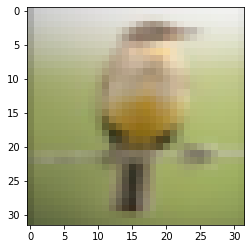

In [6]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

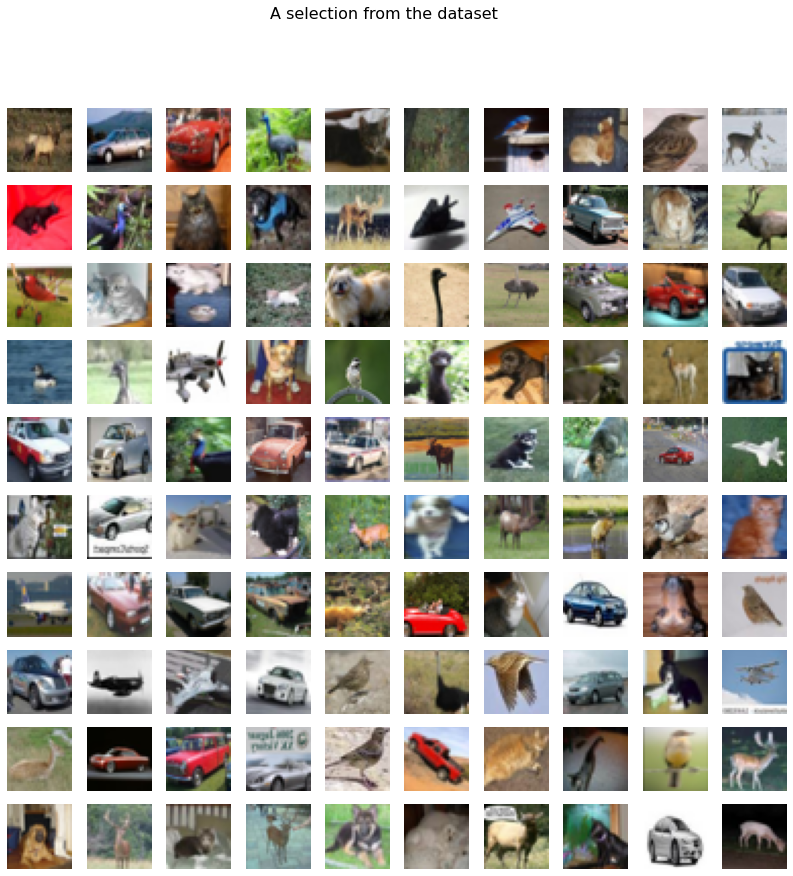

In [7]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx].reshape((32, 32, 3)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [8]:
vgg16 = models.vgg16(totalClass)
#vgg16.summary()
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [9]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 12s 45ms/step - loss: 1.7964 - accuracy: 0.1667
test loss, test acc: [1.796445369720459, 0.1666666716337204]
Evaluate on test data
12/12 [==============================] - 1s 115ms/step - loss: 1.7968 - accuracy: 0.1667
test loss, test acc: [1.796809434890747, 0.1666666716337204]


In [10]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
300/300 [==============================] - 13s 35ms/step - loss: 1.6551 - accuracy: 0.2996 - val_loss: 1.4298 - val_accuracy: 0.4218
Epoch 2/250
300/300 [==============================] - 10s 34ms/step - loss: 1.3835 - accuracy: 0.4352 - val_loss: 1.2504 - val_accuracy: 0.5055
Epoch 3/250
300/300 [==============================] - 10s 34ms/step - loss: 1.1996 - accuracy: 0.5182 - val_loss: 1.0851 - val_accuracy: 0.5780
Epoch 4/250
300/300 [==============================] - 10s 34ms/step - loss: 1.0896 - accuracy: 0.5634 - val_loss: 1.0797 - val_accuracy: 0.5777
Epoch 5/250
300/300 [==============================] - 10s 34ms/step - loss: 1.0048 - accuracy: 0.6060 - val_loss: 0.9961 - val_accuracy: 0.6227
Epoch 6/250
300/300 [==============================] - 10s 34ms/step - loss: 0.9438 - accuracy: 0.6342 - val_loss: 0.9499 - val_accuracy: 0.6285
Epoch 7/250
300/300 [==============================] - 10s 34ms/step - loss: 0.8764 - accuracy: 0.6594 - val_loss: 0.9423 - val_ac

In [11]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 2s 30ms/step - loss: 9.2241e-07 - accuracy: 1.0000
test loss, test acc: [9.224069117408362e-07, 1.0]
Evaluate on test data
12/12 [==============================] - 0s 29ms/step - loss: 2.8356 - accuracy: 0.7528
test loss, test acc: [2.835568428039551, 0.7528333067893982]


# Small

In [12]:
small = models.small(totalClass)
#small.summary()
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 1s 8ms/step - loss: 13.7144 - accuracy: 0.1705
test loss, test acc: [13.714377403259277, 0.17053332924842834]
Evaluate on test data
12/12 [==============================] - 0s 15ms/step - loss: 13.5552 - accuracy: 0.1757
test loss, test acc: [13.555219650268555, 0.1756666600704193]


In [14]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
300/300 [==============================] - 3s 8ms/step - loss: 3.3209 - accuracy: 0.3213 - val_loss: 1.2910 - val_accuracy: 0.4888
Epoch 2/250
300/300 [==============================] - 2s 7ms/step - loss: 1.3248 - accuracy: 0.4617 - val_loss: 1.1696 - val_accuracy: 0.5340
Epoch 3/250
300/300 [==============================] - 2s 7ms/step - loss: 1.2181 - accuracy: 0.5066 - val_loss: 1.1324 - val_accuracy: 0.5577
Epoch 4/250
300/300 [==============================] - 2s 8ms/step - loss: 1.1489 - accuracy: 0.5390 - val_loss: 1.0411 - val_accuracy: 0.6017
Epoch 5/250
300/300 [==============================] - 2s 7ms/step - loss: 1.1010 - accuracy: 0.5628 - val_loss: 1.0239 - val_accuracy: 0.5993
Epoch 6/250
300/300 [==============================] - 2s 7ms/step - loss: 1.0498 - accuracy: 0.5859 - val_loss: 0.9675 - val_accuracy: 0.6323
Epoch 7/250
300/300 [==============================] - 2s 7ms/step - loss: 1.0238 - accuracy: 0.5967 - val_loss: 0.9514 - val_accuracy: 0.6322

In [15]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 0s 7ms/step - loss: 0.2561 - accuracy: 0.9432
test loss, test acc: [0.25609204173088074, 0.9431999921798706]
Evaluate on test data
12/12 [==============================] - 0s 7ms/step - loss: 0.6380 - accuracy: 0.7922
test loss, test acc: [0.6379927396774292, 0.7921666502952576]


#tNet

In [16]:
tNet = models.tNet(totalClass)
#tNet.summary()

In [17]:
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [18]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 4s 46ms/step - loss: 2.7064 - accuracy: 0.1800
test loss, test acc: [2.70643949508667, 0.18000000715255737]
Evaluate on test data
12/12 [==============================] - 1s 84ms/step - loss: 2.7083 - accuracy: 0.1818
test loss, test acc: [2.7082905769348145, 0.18183332681655884]


In [19]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
300/300 [==============================] - 14s 41ms/step - loss: 1.4667 - accuracy: 0.4188 - val_loss: 1.2373 - val_accuracy: 0.5093
Epoch 2/250
300/300 [==============================] - 12s 39ms/step - loss: 1.1455 - accuracy: 0.5449 - val_loss: 1.1013 - val_accuracy: 0.5632
Epoch 3/250
300/300 [==============================] - 12s 39ms/step - loss: 1.0018 - accuracy: 0.6051 - val_loss: 1.0502 - val_accuracy: 0.5822
Epoch 4/250
300/300 [==============================] - 12s 39ms/step - loss: 0.8738 - accuracy: 0.6626 - val_loss: 1.0711 - val_accuracy: 0.5835
Epoch 5/250
300/300 [==============================] - 12s 39ms/step - loss: 0.7599 - accuracy: 0.7119 - val_loss: 0.9844 - val_accuracy: 0.6210
Epoch 6/250
300/300 [==============================] - 12s 39ms/step - loss: 0.6348 - accuracy: 0.7655 - val_loss: 1.1410 - val_accuracy: 0.5812
Epoch 7/250
300/300 [==============================] - 12s 39ms/step - loss: 0.5181 - accuracy: 0.8175 - val_loss: 1.0626 - val_ac

In [20]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 2s 39ms/step - loss: 0.0016 - accuracy: 0.9996
test loss, test acc: [0.001579251722432673, 0.9996333122253418]
Evaluate on test data
12/12 [==============================] - 0s 38ms/step - loss: 2.0632 - accuracy: 0.6862
test loss, test acc: [2.0632009506225586, 0.6861666440963745]


# ConvNet

In [21]:
convNet = models.convNet(totalClass)
#convNet.summary()

In [22]:
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [23]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 7s 67ms/step - loss: 5.9924 - accuracy: 0.1785
test loss, test acc: [5.9923601150512695, 0.17846666276454926]
Evaluate on test data
12/12 [==============================] - 2s 181ms/step - loss: 6.0242 - accuracy: 0.1793
test loss, test acc: [6.024228096008301, 0.17933332920074463]


In [24]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
300/300 [==============================] - 13s 40ms/step - loss: 1.3015 - accuracy: 0.4658 - val_loss: 1.1092 - val_accuracy: 0.5472
Epoch 2/250
300/300 [==============================] - 12s 39ms/step - loss: 1.0401 - accuracy: 0.5802 - val_loss: 0.9825 - val_accuracy: 0.6055
Epoch 3/250
300/300 [==============================] - 12s 39ms/step - loss: 0.9429 - accuracy: 0.6263 - val_loss: 0.9603 - val_accuracy: 0.6175
Epoch 4/250
300/300 [==============================] - 12s 39ms/step - loss: 0.8631 - accuracy: 0.6601 - val_loss: 0.8470 - val_accuracy: 0.6718
Epoch 5/250
300/300 [==============================] - 12s 39ms/step - loss: 0.7869 - accuracy: 0.6926 - val_loss: 0.8149 - val_accuracy: 0.6832
Epoch 6/250
300/300 [==============================] - 12s 39ms/step - loss: 0.7305 - accuracy: 0.7191 - val_loss: 0.7728 - val_accuracy: 0.7005
Epoch 7/250
300/300 [==============================] - 12s 39ms/step - loss: 0.6778 - accuracy: 0.7362 - val_loss: 0.7758 - val_ac

In [25]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
59/59 [==============================] - 3s 46ms/step - loss: 3.6195e-05 - accuracy: 1.0000
test loss, test acc: [3.619544077082537e-05, 1.0]
Evaluate on test data
12/12 [==============================] - 1s 45ms/step - loss: 1.2577 - accuracy: 0.8317
test loss, test acc: [1.2576502561569214, 0.8316666483879089]


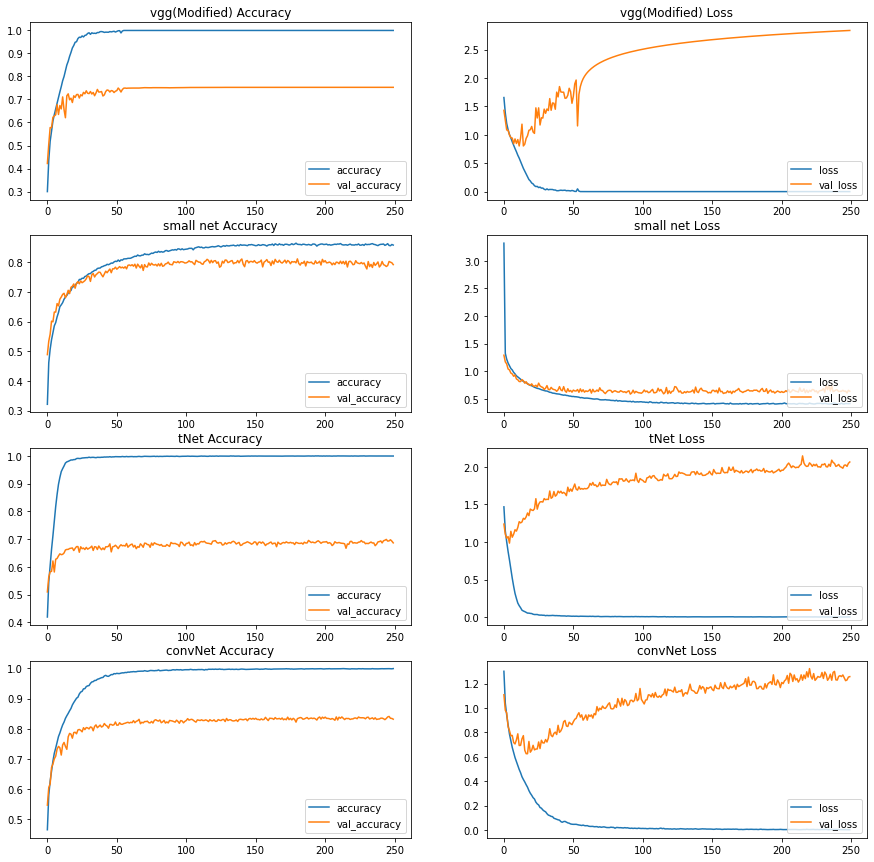

In [26]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1